In [3]:
import pandas as pd

# Load the CSV
df = pd.read_csv(r"C:\Users\maniy\ds_project\data\_cancer_dataset_uae.csv")

# Show the first 5 rows
df.head()


,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [4]:
df.tail()


,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193
9999,PAT010000,31,Male,Expatriate,Dubai,2017-09-16,Liver,I,Radiation,2017-12-23,Zayed Military Hospital,Dr. SI45,Under Treatment,NaN,NaN,Smoker,Hypertension,East Asian,56,173


In [9]:
# Dataset shape (rows, columns)
df.shape

# Columns and data types
df.info()

# Summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


In [10]:
# Count of missing values per column
df.isnull().sum()


Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [12]:
# Remove duplicates if any
df = df.drop_duplicates()

In [13]:
# Fill missing comorbidities
df['Comorbidities'] = df['Comorbidities'].fillna("None")

# For Death_Date and Cause_of_Death, we can keep as NaN
# Or create a new column 'Is_Deceased'
df['Is_Deceased'] = df['Death_Date'].notna().astype(int)

In [15]:
df['Diagnosis_Date'] = pd.to_datetime(df['Diagnosis_Date'])
df['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])
df['Death_Date'] = pd.to_datetime(df['Death_Date'])


In [16]:
df.info()         # check data types and missing values
df.head()         # see first rows
df['Is_Deceased'].value_counts()  # check deceased/alive counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Patient_ID            10000 non-null  object        
 1   Age                   10000 non-null  int64         
 2   Gender                10000 non-null  object        
 3   Nationality           10000 non-null  object        
 4   Emirate               10000 non-null  object        
 5   Diagnosis_Date        10000 non-null  datetime64[ns]
 6   Cancer_Type           10000 non-null  object        
 7   Cancer_Stage          10000 non-null  object        
 8   Treatment_Type        10000 non-null  object        
 9   Treatment_Start_Date  10000 non-null  datetime64[ns]
 10  Hospital              10000 non-null  object        
 11  Primary_Physician     10000 non-null  object        
 12  Outcome               10000 non-null  object        
 13  Death_Date       

Is_Deceased
0    9008
1     992
Name: count, dtype: int64

In [17]:
df.dtypes


Patient_ID                      object
Age                              int64
Gender                          object
Nationality                     object
Emirate                         object
Diagnosis_Date          datetime64[ns]
Cancer_Type                     object
Cancer_Stage                    object
Treatment_Type                  object
Treatment_Start_Date    datetime64[ns]
Hospital                        object
Primary_Physician               object
Outcome                         object
Death_Date              datetime64[ns]
Cause_of_Death                  object
Smoking_Status                  object
Comorbidities                   object
Ethnicity                       object
Weight                           int64
Height                           int64
Is_Deceased                      int64
dtype: object

In [18]:
# Fill missing comorbidities
df['Comorbidities'] = df['Comorbidities'].fillna("None")

# Optional: confirm missing values
df.isnull().sum()


Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities              0
Ethnicity                  0
Weight                     0
Height                     0
Is_Deceased                0
dtype: int64

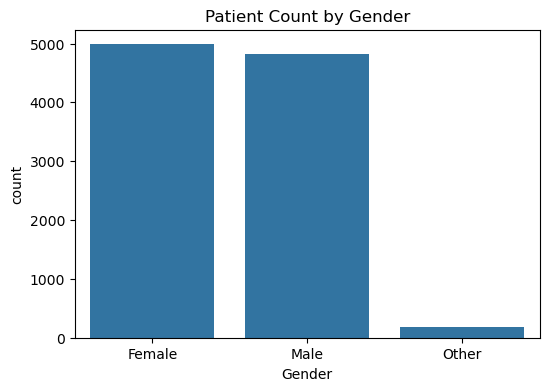

In [19]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Patient Count by Gender")
plt.show()


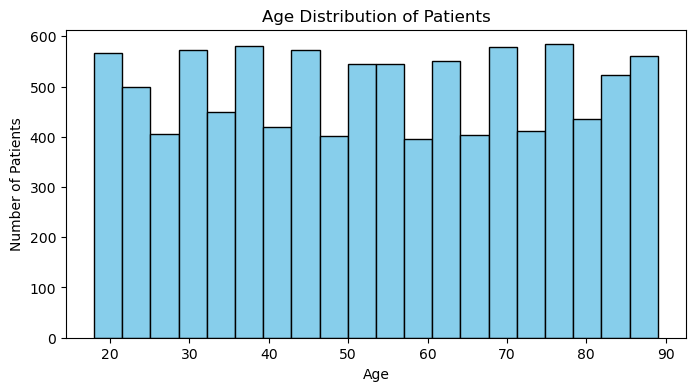

In [20]:
#AGE DISTRIBUTION OF PATIENT

plt.figure(figsize=(8,4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


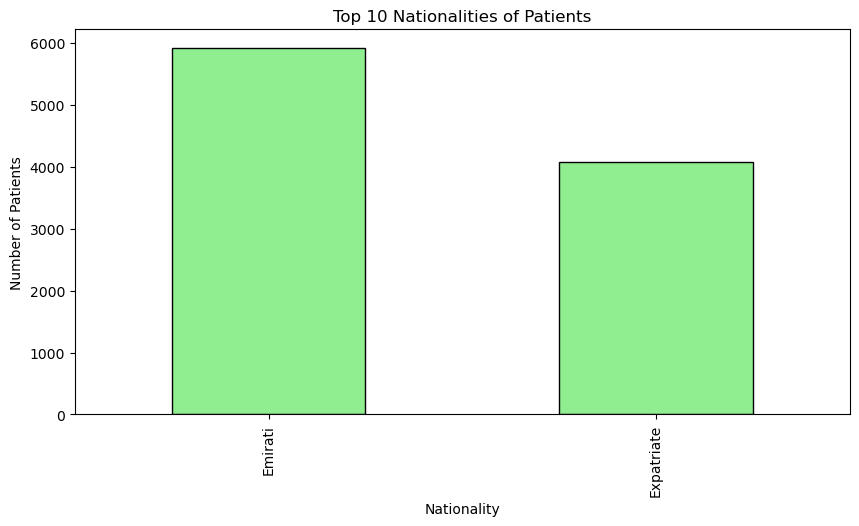

In [21]:
#Nationality Distribution (Top 10)
plt.figure(figsize=(10,5))
df['Nationality'].value_counts().head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Nationalities of Patients")
plt.xlabel("Nationality")
plt.ylabel("Number of Patients")
plt.show()


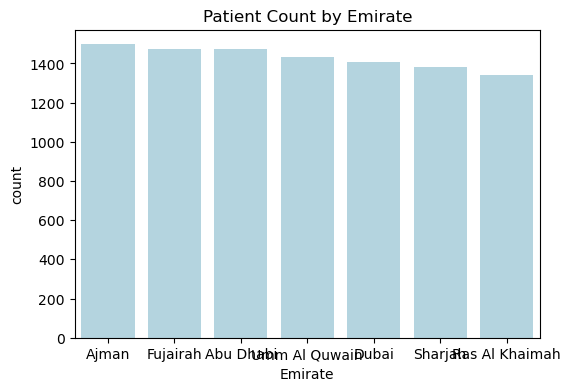

In [23]:
#Emirate distribution
# plt.figure(figsize=(6,4))
# sns.countplot(x='Emirate', data=df, order=df['Emirate'].value_counts().index, palette='pastel')
# plt.title("Patient Count by Emirate")
# plt.show()
plt.figure(figsize=(6,4))
sns.countplot(x='Emirate', data=df, order=df['Emirate'].value_counts().index, color='lightblue')
plt.title("Patient Count by Emirate")
plt.show()



C:\Users\maniy\AppData\Local\Temp\ipykernel_4340\2694920387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cancer_Type', data=df, order=df['Cancer_Type'].value_counts().index, palette='viridis')


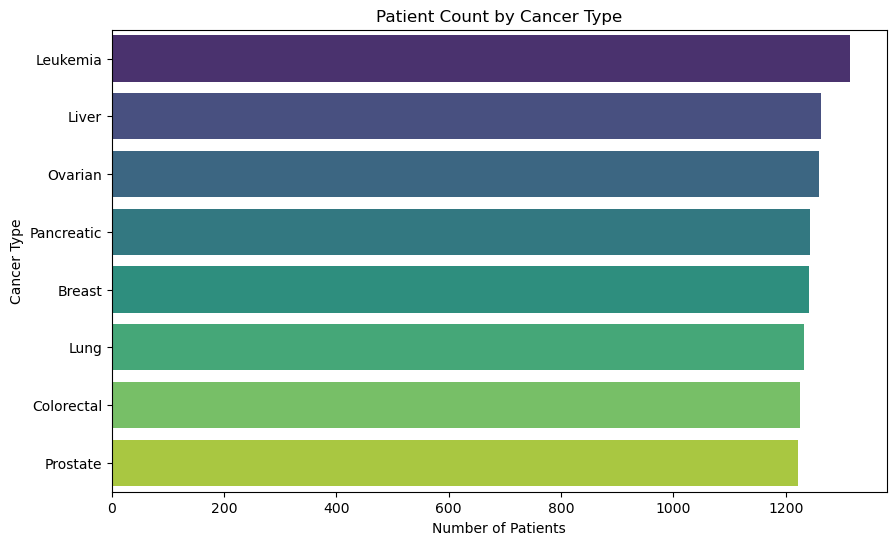

In [24]:
#cancer type distriution
plt.figure(figsize=(10,6))
sns.countplot(y='Cancer_Type', data=df, order=df['Cancer_Type'].value_counts().index, palette='viridis')
plt.title("Patient Count by Cancer Type")
plt.xlabel("Number of Patients")
plt.ylabel("Cancer Type")
plt.show()


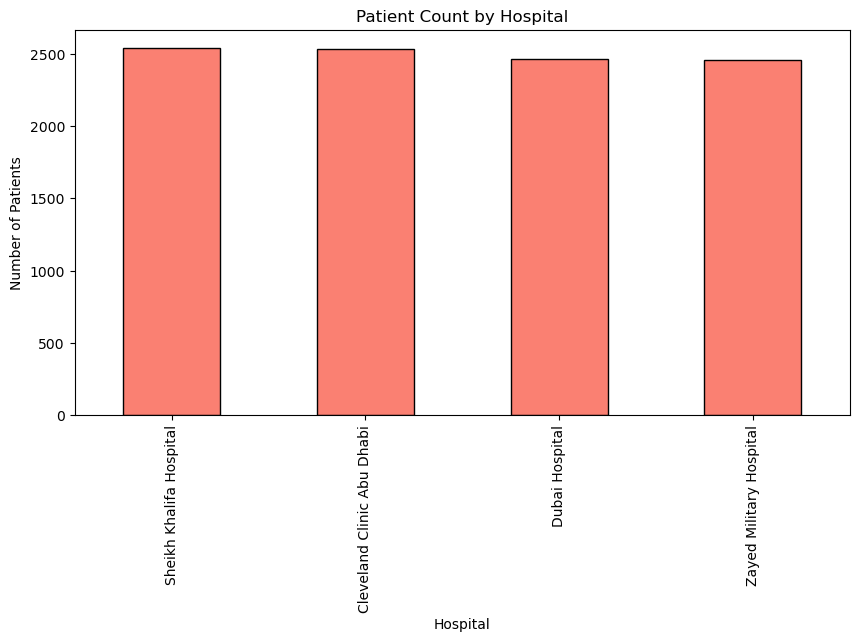

In [25]:
#ppatient count per hospital
plt.figure(figsize=(10,5))
df['Hospital'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Patient Count by Hospital")
plt.xlabel("Hospital")
plt.ylabel("Number of Patients")
plt.show()


C:\Users\maniy\AppData\Local\Temp\ipykernel_4340\2987792979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Treatment_Type', data=df, order=df['Treatment_Type'].value_counts().index, palette='cool')


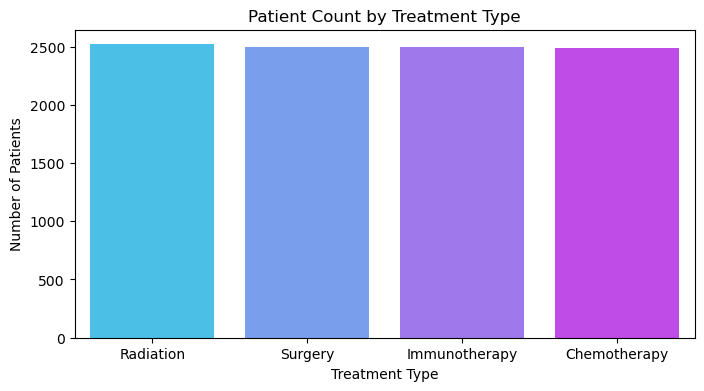

In [26]:
#Treatment Type Distribution
plt.figure(figsize=(8,4))
sns.countplot(x='Treatment_Type', data=df, order=df['Treatment_Type'].value_counts().index, palette='cool')
plt.title("Patient Count by Treatment Type")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Patients")
plt.show()


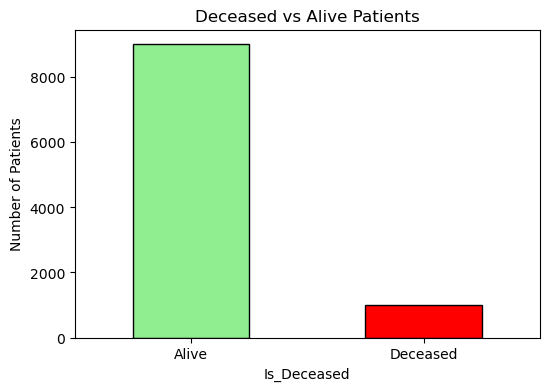

In [27]:
#Deceased vs Alive Patients
plt.figure(figsize=(6,4))
df['Is_Deceased'].value_counts().plot(kind='bar', color=['lightgreen','red'], edgecolor='black')
plt.title("Deceased vs Alive Patients")
plt.xticks([0,1], ['Alive', 'Deceased'], rotation=0)
plt.ylabel("Number of Patients")
plt.show()


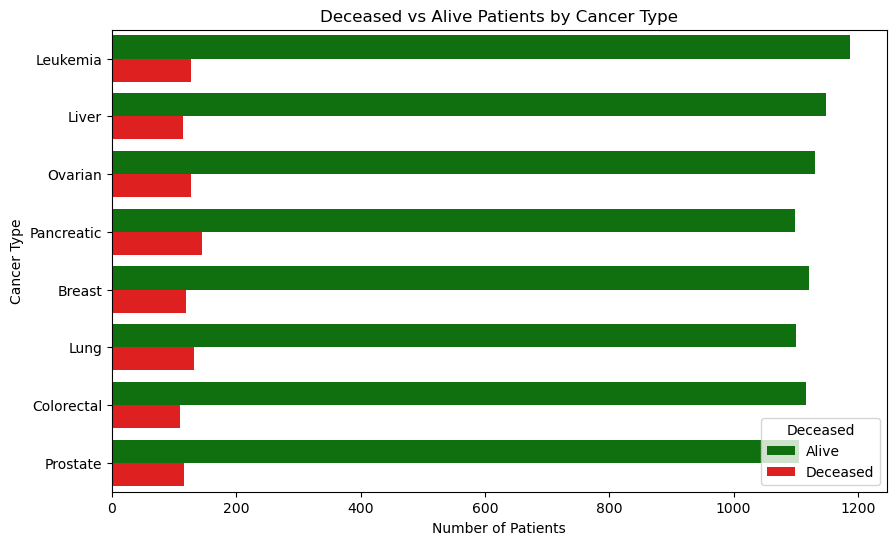

In [28]:
#Deceased by Cancer Type
plt.figure(figsize=(10,6))
sns.countplot(y='Cancer_Type', hue='Is_Deceased', data=df, 
              order=df['Cancer_Type'].value_counts().index, palette=['green','red'])
plt.title("Deceased vs Alive Patients by Cancer Type")
plt.xlabel("Number of Patients")
plt.ylabel("Cancer Type")
plt.legend(title='Deceased', labels=['Alive', 'Deceased'])
plt.show()


In [31]:
#Prepare Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Select features
# features = ['Age', 'Gender', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type', 'Hospital', 'Comorbidities', 'Smoking_Status']
# Select features and make a copy
X = df[features].copy()
y = df['Is_Deceased']

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

    


In [33]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))



Accuracy: 0.899
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1798
           1       0.00      0.00      0.00       202

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000



In [34]:
#Use metrics suitable for imbalanced data:
from sklearn.metrics import roc_auc_score, f1_score

print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


F1 Score: 0.0
ROC AUC: 0.487787585766363


In [39]:
from imblearn.over_sampling import SMOTE

# Oversample minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data again
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Train logistic regression again
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

# F1 Score & ROC AUC
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



F1 Score: 0.6317241379310344
ROC AUC: 0.6854671280276817

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      1819
           1       0.62      0.64      0.63      1785

    accuracy                           0.63      3604
   macro avg       0.63      0.63      0.63      3604
weighted avg       0.63      0.63      0.63      3604


Confusion Matrix:
 [[1124  695]
 [ 640 1145]]


C:\Users\maniy\AppData\Local\Temp\ipykernel_4340\3838842885.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


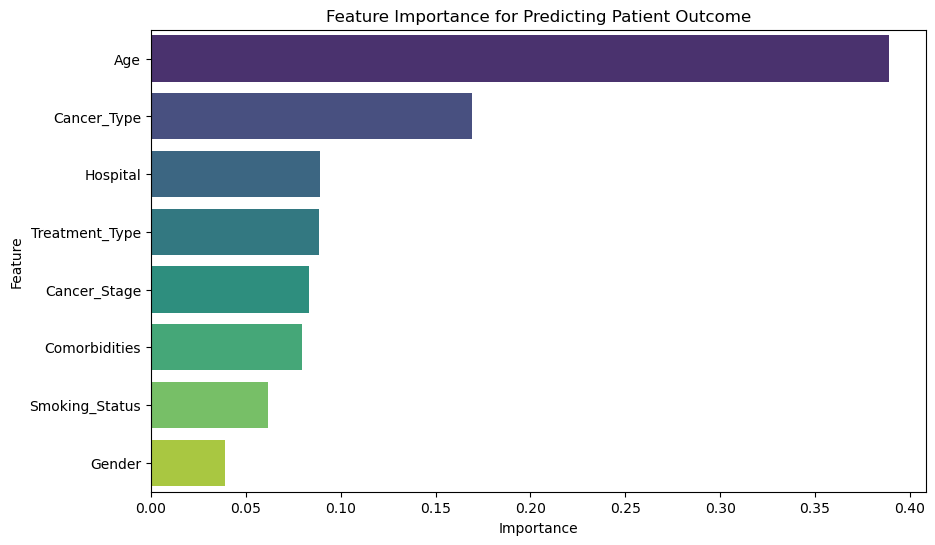

In [43]:
#Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
importances = None

# Train Random Forest on the balanced dataset
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance for Predicting Patient Outcome")
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\maniy\AppData\Local\Temp\ipykernel_4340\1866538115.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel', ax=axes[0,0])
C:\Users\maniy\AppData\Local\Temp\ipykernel_4340\1866538115.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Cancer_Type', data=df, order=df['Cancer_Type'].value_counts().head(10).index, palette='viridis', ax=axes[1,0])
C:\Users\maniy\AppData\Local\Temp\ipykernel_4340\1866538115.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp

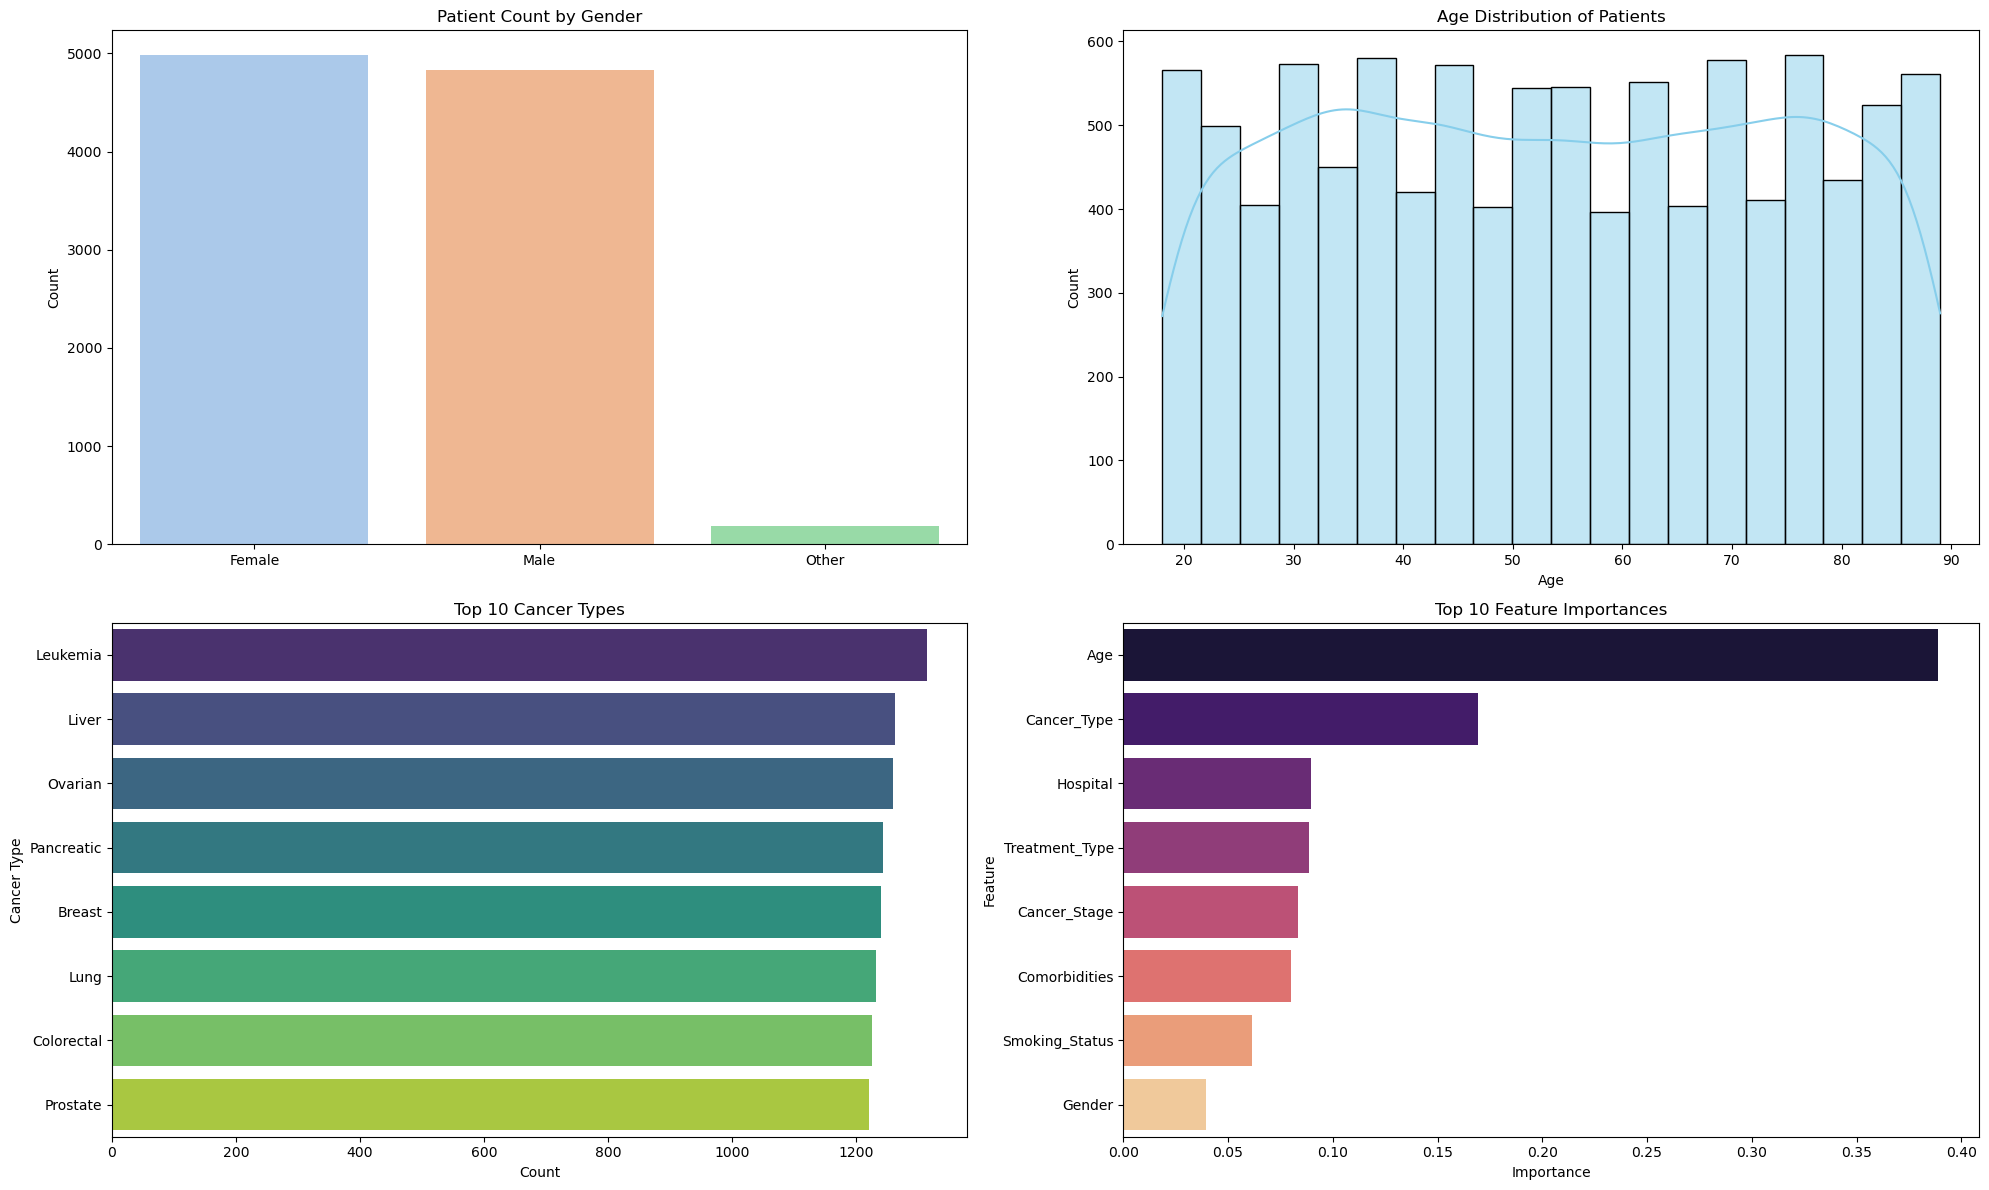

In [47]:
plt.tight_layout()
plt.savefig("UAE_Cancer_Executive_Summary.png", dpi=300)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20,12))

# 1️⃣ Gender
sns.countplot(x='Gender', data=df, palette='pastel', ax=axes[0,0])
axes[0,0].set_title("Patient Count by Gender")
axes[0,0].set_xlabel("")
axes[0,0].set_ylabel("Count")

# 2️⃣ Age
sns.histplot(df['Age'], bins=20, color='skyblue', kde=True, ax=axes[0,1])
axes[0,1].set_title("Age Distribution of Patients")
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("Count")

# 3️⃣ Top Cancer Types
sns.countplot(y='Cancer_Type', data=df, order=df['Cancer_Type'].value_counts().head(10).index, palette='viridis', ax=axes[1,0])
axes[1,0].set_title("Top 10 Cancer Types")
axes[1,0].set_xlabel("Count")
axes[1,0].set_ylabel("Cancer Type")

# 4️⃣ Feature Importance
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma', ax=axes[1,1])
axes[1,1].set_title("Top 10 Feature Importances")
axes[1,1].set_xlabel("Importance")
axes[1,1].set_ylabel("Feature")

# Adjust layout
plt.tight_layout()

# Save figure
fig.savefig("UAE_Cancer_Executive_Summary.png", dpi=300)

# Render figure
plt.show()